# Homework Solution 2

Ming Hong (mh4286@nyu.edu)

In [15]:
%pylab inline
import numpy as np
import pandas as pd
import fmt
import time
import sympy as sp

Populating the interactive namespace from numpy and matplotlib


## Problem 1:

Prove the following properties for the matrix norm, where $A, B$ are matrices, $\boldsymbol u$ is a vector and $b$ is a scaler.
$\renewcommand{bs}{\boldsymbol}$
* $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$
* $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $
* $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $
* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

### Solution 1

**1)** By definition of matrix norm, we have:
$$ \Vert A^{-1}\Vert  = \max_{\bs x \ne \bs 0}\frac{\Vert A^{-1}\bs x\Vert }{\Vert \bs x\Vert }  $$
Let $\bs x=A \bs u$, we have

$$ \Vert A^{-1} \Vert = \max_{A \bs u \ne \bs 0} \frac{\Vert A^{-1} A \bs u \Vert}{\Vert A \bs u \Vert} = \max_{\bs u \ne \bs 0} \frac{\Vert \bs u \Vert}{\Vert A \bs u \Vert} = \left( \min_{\bs u \ne \bs 0} \frac{\Vert A \bs u \Vert }{\Vert \bs u \Vert} \right)^{-1}$$

**2)** Since $ \Vert A \Vert  = \max_{\bs u \ne \bs 0}\frac{\Vert A\bs u\Vert }{\Vert \bs u\Vert } $, we have $ \Vert A \Vert  \ge \frac{\Vert A\bs u\Vert }{\Vert \bs u\Vert } , \forall \bs u \ne \bs 0 $. Therefore, $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \Vert \bs u\Vert, \forall \bs u$. 

**3)** By the homogenuity of vector norms  $\Vert a \bs u \Vert  = |a| \Vert \bs u\Vert $, it follows that
$$ \begin{align}
\Vert b A \Vert & = \max_{\bs u \ne \bs 0}\frac{\Vert bA \bs u\Vert }{\Vert \bs u\Vert} \\
 & = \max_{\bs u \ne \bs 0}\frac{\vert b\vert \; \Vert A\bs u\Vert }{\Vert \bs u\Vert} \\
 & = \vert b\vert \Vert A\Vert
\end{align} $$

**4)** By the triangle inequality of vector norms, we have
$$ \begin{align}
\Vert A + B \Vert & = \max_{\bs u \ne \bs 0} \frac{\Vert \left(A+B\right)\bs u \Vert}{\Vert \bs u \Vert} \\
 & \le \max_{\bs u \ne \bs 0} \frac{\Vert A \bs u \Vert + \Vert B \bs u \Vert}{\Vert \bs u \Vert} \\
 & = \Vert A \Vert + \Vert B \Vert
\end{align}$$

**5)** Suppose $ \Vert \bs u \Vert = \bs 1 $, then from **2)** we have that

$$ \begin{align}
\Vert AB \Vert & = \max_{\Vert \bs u \Vert = \bs 1} \Vert AB \bs u \Vert \le \max_{\Vert \bs u \Vert = \bs 1} \Vert A \Vert \Vert B \bs u \Vert \\
& = \Vert A \Vert \cdot \max_{\Vert \bs u \Vert = \bs 1} \Vert B \bs u \Vert \\
& = \Vert A \Vert \Vert B \Vert 
\end{align} $$


## Problem 2



0. Derive the analytical expression of Cholesky decomposition of a 2 dimensional correlation matrix 
$\left(\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right)$, this result is worth memorizing.
1. Implement the recursive Cholesky decomposition algorithm discussed in the class in Python, with the following requirements:
 - use vector/matrix calculation whenever possible, but you obviously should not just call the buildin numpy/scipy functions for Cholesky decomposition 
 - detect and throw exception if the input matrix is not semi-positive definite
3. test your program against the version provided in scipy.linalg, and compare their performance

Hint: for #2, if you don't know what conditoin to catch, you can create a non-SPD matrix and observe how your program can fail. 

### Solution 2

1. Set $ A = \left(\begin{array} \\1 & \rho \\ \rho & 1 \end{array} \right) = LL^T$, where $L$ is a lower triangular matrix $\left(\begin{array} \\a & 0 \\ b & c \end{array} \right)$, thus we have

    $$ A = \left(\begin{array} \\1 & \rho \\ \rho & 1 \end{array} \right) = \left(\begin{array} \\a & 0 \\ b & c \end{array} \right) \left(\begin{array} \\a & b \\ 0 & c \end{array} \right) = \left(\begin{array} \\a^2 & ab \\ ab & b^2+c^2 \end{array} \right) $$
    
    we have $a = 1, b = \rho, c = \sqrt{1-\rho^2} $. 
    
    Hence, 
    $$ L = \left(\begin{array} \\1 & 0 \\ \rho & \sqrt{1-\rho^2}\end{array} \right) $$
    
2. Please see the following code:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Answers agree? True


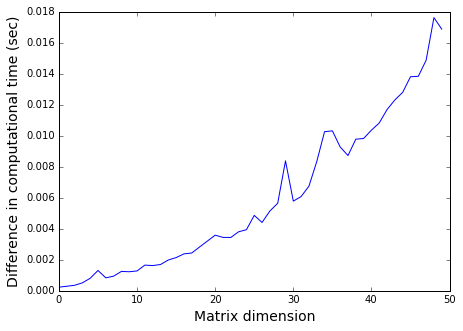

In [20]:
def reduce_matrix(A):
    a11 = A[0,0]
    A21 = np.mat(A[1:,0])
    A22 = np.mat(A[1:,1:])
    return A22 - A21*A21.T/a11

def my_cholesky(A):
    np.linalg.eigvals(A) # error would be raised if not spd
    n = A.shape[0]
    if n == 1:
        return np.sqrt(A)
    l11 = np.sqrt(A[0,0])
    A21 = np.mat(A[1:,0])
    return np.bmat([[np.mat(l11), np.zeros((1,n-1))],
                     [A21/l11, my_cholesky(reduce_matrix(A))]])

# test
A = np.mat(np.random.randn(3,3))
A = A*A.T

Ans1 = my_cholesky(A)
Ans2 = np.linalg.cholesky(A)

L1,L2 = sp.symbols("L_1 L_2")

fmt.displayMath(fmt.joinMath('=', L1, sp.Matrix(Ans1).evalf(4)))
fmt.displayMath(fmt.joinMath('=', L2, sp.Matrix(Ans2).evalf(4)))

print("Answers agree? %s" % np.allclose(Ans1,Ans2))

t = np.zeros(50)
for i in range(2,52,1):
    A = np.mat(np.random.randn(i,i))
    A = A*A.T
    t0 = time.clock()
    ans1 = my_cholesky(A)
    t1 = time.clock()
    ans2 = np.linalg.cholesky(A)
    t2 = time.clock()
    
    t[i-2] = (t1-t0)-(t2-t1) # New minus built-in

plt.figure(figsize=(7,5))
plt.plot(range(50),t)
plt.xlabel('Matrix dimension',fontsize=14)
plt.ylabel('Difference in computational time (sec)',fontsize=14)
plt.show()

## Problem 3

Take the portfolio and historical stock time series of the Dow Jones industrial average (DJIA) index:

In [23]:
djiaurl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/djia.csv"
djia = pd.read_csv(djiaurl, index_col=[0])

fmt.displayDF(djia)

,Name,Sector,Weights
Ticker,,,
MMM,3M Co.,Diversified Industrials,0.0539
AXP,American Express Co.,Consumer Finance,0.0324
T,AT&T Inc.,Fixed Line Telecommunications,0.0134
BA,Boeing Co.,Aerospace/Defense Products & Services,0.0483
CAT,Caterpillar Inc.,Commercial Vehicles & Trucks,0.0373
CVX,Chevron Corp.,Integrated Oil & Gas,0.0438
CSCO,"Cisco Systems, Inc",Networking & Communication,0.0091
KO,Coca-Cola Co.,Soft Drinks,0.0168
DD,E.I. DuPont de Nemours & Co.,Commodity Chemicals,0.0263


C:\Users\Jamie\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)


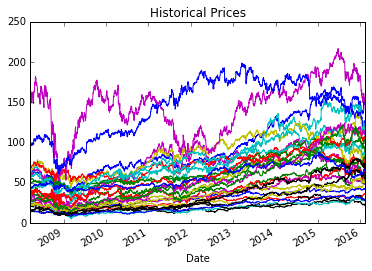

In [24]:
def download_hist_prices(tickers) : # we download the stock prices from Yahoo!Finance
    base_url = "http://ichart.finance.yahoo.com/table.csv?s="
    closeKey = 'Adj Close'
    dfs = []

    for ticker in tickers:
        try :
            url = base_url + ticker
            dfs.append(pd.read_csv(url, parse_dates=[0], index_col=[0]).rename(columns={closeKey:ticker})[ticker])
        except Error:
            print "error in " + ticker
            continue

    return pd.concat(dfs, axis=1, join='inner')

histprice = download_hist_prices(djia.index).sort()
histprice.plot(legend=False, title='Historical Prices');

1. estimate the historical correlation and covariance matrix of the DJIA constiuents' daily returns, 
2. estimate historical excess return of individual stocks (assume the historical risk free rate is 3%)
3. compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
4. compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns.
5. compute the condition number of the covariance matrix, and comments the numerical stability of the optimal portfolio. You can use the python function ```numpy.linalg.norm``` for matrix norm.
2. take the daily return time series, and split them into two segments: one only contains odd days' returns and the other only contains even days' returns. Then estimate every DJIA stock's annualized return and annualized vol from these two data segements, and compare their results. Please comment on which of the two metric, return or volatility, can be reliably estimated from historical data. 
6. [Extra credit] Please repeat the analysis using weekly returns and comment on whether the results are materially different
6. [Extra credit]: use numerical simulation to show that the optimal portfolio from #3 indeed has the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio. ```numpy.random``` is a random number generator package in Python.
7. [Extra credit, open question] comment on what practical implication you might infer from the results in 8.

Hints and requirements: 
* as discussed in class, returns are only meaningful in the relative sense, so please annualize all your results. You will lose credit without annualization.
* you may run into singular matrix when reverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and he doesn't understand what is a singular matrix that can't be inverted).
* on part 5, you can use array slice to split btw even and odd elements, see the following example:

In [5]:
whole = np.arange(1, 10)
print "whole = ", whole
odd = whole[0::2]
even = whole[1::2]
print "even = ", even
print "odd = ", odd

whole =  [1 2 3 4 5 6 7 8 9]
even =  [2 4 6 8]
odd =  [1 3 5 7 9]


### Solution 3

**1)** The covariance and correlation matrices are calculated below:

In [38]:
rtn = np.log(histprice).diff()
rtn = rtn.iloc[1:] # get rid of n/a

cv=rtn.cov() # covariance matrix
cr=rtn.corr() # correlation matrix

print("Covariance Matrix")
fmt.displayDF(cv*1e4,fmt="3f")
print("Correlation Matrix")
fmt.displayDF(cr,fmt="3f")

Covariance Matrix


,MMM,AXP,T,BA,CAT,CVX,CSCO,KO,DD,XOM,GE,GS,HD,INTC,IBM,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
MMM,2.210,2.405,1.189,1.787,2.200,1.746,1.759,0.967,1.960,1.581,2.081,2.175,1.578,1.660,1.247,1.032,2.538,0.983,1.274,1.575,1.501,1.281,1.028,1.734,1.790,1.623,1.187,1.481,0.862,1.851
AXP,2.405,7.054,2.034,2.928,3.575,2.674,2.857,1.425,3.220,2.285,3.623,4.653,2.808,2.850,1.932,1.405,5.618,1.514,2.067,2.611,2.664,2.117,1.529,3.237,2.700,2.767,1.910,3.190,1.246,3.154
T,1.189,2.034,1.962,1.423,1.657,1.601,1.546,0.924,1.607,1.478,1.574,2.032,1.386,1.482,1.160,0.909,2.241,0.853,1.247,1.427,1.305,1.164,0.971,1.487,1.363,1.427,1.553,1.304,0.846,1.598
BA,1.787,2.928,1.423,3.713,2.552,2.039,2.020,1.161,2.265,1.867,2.317,2.623,1.843,1.947,1.490,1.129,2.899,1.211,1.495,1.871,1.913,1.437,1.130,1.909,2.215,1.978,1.258,1.799,0.990,2.255
CAT,2.200,3.575,1.657,2.552,4.873,2.667,2.515,1.231,3.014,2.296,2.866,3.228,2.091,2.467,1.784,1.208,3.525,1.242,1.594,2.238,2.121,1.659,1.165,2.180,2.476,2.047,1.542,2.215,1.013,2.571
CVX,1.746,2.674,1.601,2.039,2.667,3.339,2.041,1.186,2.340,2.664,2.224,2.656,1.697,1.943,1.519,1.231,2.809,1.165,1.653,1.905,1.643,1.584,1.219,2.083,1.929,2.090,1.428,1.818,0.988,2.201
CSCO,1.759,2.857,1.546,2.020,2.515,2.041,3.976,1.113,2.305,1.834,2.218,2.799,1.882,2.324,1.665,1.120,3.130,1.151,1.517,2.205,1.894,1.414,1.135,1.997,2.004,1.841,1.403,1.915,1.028,2.224
KO,0.967,1.425,0.924,1.161,1.231,1.186,1.113,1.537,1.182,1.089,1.132,1.301,1.068,1.095,0.832,0.800,1.463,0.776,1.005,1.116,1.045,0.950,0.847,1.186,1.117,1.297,0.880,0.843,0.688,1.243
DD,1.960,3.220,1.607,2.265,3.014,2.340,2.305,1.182,3.762,2.083,2.609,2.997,2.022,2.189,1.651,1.193,3.496,1.226,1.626,2.033,1.979,1.614,1.239,2.162,2.155,1.974,1.494,2.051,0.999,2.429
XOM,1.581,2.285,1.478,1.867,2.296,2.664,1.834,1.089,2.083,2.713,1.937,2.226,1.460,1.755,1.349,1.149,2.410,1.070,1.517,1.728,1.498,1.447,1.165,1.841,1.725,1.808,1.316,1.558,0.934,1.950


Correlation Matrix


,MMM,AXP,T,BA,CAT,CVX,CSCO,KO,DD,XOM,GE,GS,HD,INTC,IBM,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
MMM,1.000,0.609,0.571,0.624,0.670,0.643,0.594,0.524,0.680,0.646,0.651,0.556,0.599,0.591,0.582,0.635,0.577,0.547,0.498,0.571,0.539,0.573,0.589,0.594,0.745,0.475,0.567,0.480,0.468,0.668
AXP,0.609,1.000,0.547,0.572,0.610,0.551,0.539,0.433,0.625,0.522,0.635,0.665,0.597,0.568,0.505,0.484,0.714,0.472,0.452,0.530,0.536,0.530,0.490,0.621,0.629,0.454,0.511,0.578,0.378,0.637
T,0.571,0.547,1.000,0.527,0.536,0.626,0.553,0.532,0.592,0.641,0.523,0.551,0.558,0.560,0.574,0.593,0.540,0.504,0.518,0.550,0.498,0.552,0.590,0.541,0.602,0.444,0.787,0.448,0.487,0.612
BA,0.624,0.572,0.527,1.000,0.600,0.579,0.526,0.486,0.606,0.588,0.559,0.517,0.540,0.535,0.536,0.536,0.508,0.520,0.451,0.523,0.530,0.496,0.499,0.505,0.711,0.447,0.464,0.449,0.414,0.628
CAT,0.670,0.610,0.536,0.600,1.000,0.661,0.571,0.450,0.704,0.631,0.604,0.555,0.535,0.592,0.561,0.500,0.539,0.466,0.420,0.547,0.513,0.500,0.449,0.503,0.694,0.404,0.496,0.483,0.370,0.625
CVX,0.643,0.551,0.626,0.579,0.661,1.000,0.560,0.523,0.660,0.885,0.566,0.552,0.524,0.563,0.576,0.616,0.519,0.527,0.526,0.562,0.480,0.576,0.568,0.581,0.653,0.498,0.555,0.479,0.436,0.646
CSCO,0.594,0.539,0.553,0.526,0.571,0.560,1.000,0.450,0.596,0.558,0.517,0.533,0.533,0.617,0.579,0.514,0.530,0.478,0.442,0.596,0.507,0.472,0.485,0.510,0.622,0.402,0.500,0.462,0.416,0.598
KO,0.524,0.433,0.532,0.486,0.450,0.523,0.450,1.000,0.491,0.533,0.425,0.398,0.486,0.467,0.466,0.590,0.399,0.518,0.471,0.485,0.450,0.510,0.582,0.487,0.558,0.456,0.504,0.327,0.448,0.538
DD,0.680,0.625,0.592,0.606,0.704,0.660,0.596,0.491,1.000,0.652,0.626,0.587,0.589,0.597,0.591,0.562,0.609,0.523,0.487,0.565,0.545,0.553,0.544,0.568,0.688,0.443,0.547,0.509,0.415,0.672
XOM,0.646,0.522,0.641,0.588,0.631,0.885,0.558,0.533,0.652,1.000,0.547,0.513,0.500,0.564,0.568,0.638,0.494,0.537,0.535,0.566,0.486,0.584,0.602,0.569,0.648,0.478,0.567,0.455,0.457,0.635


**2)** Annualized historical excess returns:

In [39]:
hxr = rtn.mean()*252 - 0.03 # historical excess returns assuming 252 trading days per year
print("Historical Excess Returns")
fmt.displayDF(pd.DataFrame(hxr*100, columns=["Excess Return (%)"]).T, fmt="3f")

Historical Excess Returns


,MMM,AXP,T,BA,CAT,CVX,CSCO,KO,DD,XOM,GE,GS,HD,INTC,IBM,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
Excess Return (%),7.788,1.228,2.709,4.548,-2.401,0.627,-1.253,4.362,4.097,-1.073,-2.586,-3.919,17.892,4.016,-0.732,5.837,2.191,10.010,2.640,6.473,14.723,5.600,2.214,9.755,1.979,12.528,7.382,17.692,2.529,11.714


**3)** Optimal portfolio using mean-variance is shown below. This portfolio looks reasonable as it gives more weights to the stocks with higher historical excess returns.

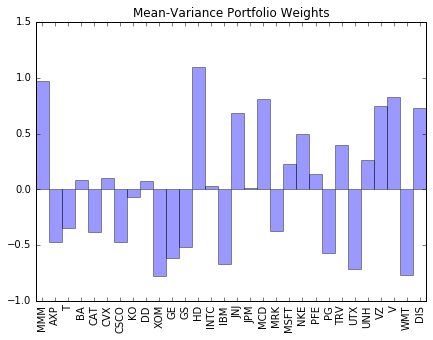

In [49]:
cvi = np.linalg.inv(cv)
w = cvi.dot(hxr)/hxr.T.dot(cvi).dot(hxr)
sum_w = np.sum(w)
w = w/sum_w # optimal portfolio weights using hist_xr
plt.figure(figsize=[7,5])
plt.bar(np.arange(30),w,width=1,alpha=0.4)
plt.xticks(np.arange(30)+0.5,rtn.keys(),rotation=90)
plt.title('Mean-Variance Portfolio Weights')
plt.show()

**4)** The implied returns are calculated assuming the DJIA weights are mean-variance optimized. Note that the implied returns are only meaningful in a relative sense. Thus we scale them so that the implied return matches the historical value for the first stock. It can be seen that the two portfolios do not resemble each other, which makes sense as the actual weights in DJIA are determined by their prices instead of the mean-variance process.

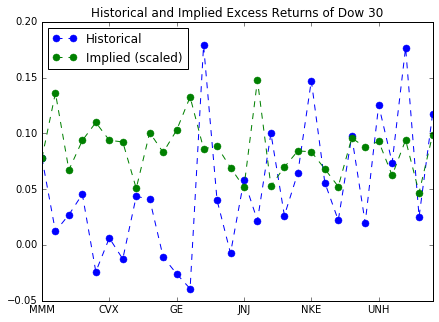

In [69]:
w2 = djia.Weights*sum_w # adjust the weights to get annualized returns
vb = w2.dot(cv).dot(w2)
ixr = cv.dot(w2)/vb # implied annual excess returns
ixr_scaled = ixr/ixr[0]*hxr[0]

df_ret = pd.concat([hxr,ixr_scaled], axis = 1, keys = ['Historical','Implied (scaled)'])
df_ret.plot(title='Historical and Implied Excess Returns of Dow 30',style='.--',markersize=14
           , figsize=[7, 5])
plt.show()

**5)** The condition numbers of the covariance matrix are large, which means the computed optimized portfolio is not numerically stable.

In [67]:
fmt.displayDF(pd.DataFrame([np.linalg.norm(cv, n)*np.linalg.norm(cvi,n) for n in (1, 2, inf)],
             index = ["L-1", "L-2", "L-$\infty$"], columns=['Condition Number']), 
              fmt="4g")

,Condition Number
L-1,435.3
L-2,180.5
L-$\infty$,435.3


**6)** The return series is splitted into two alternating series, and their annualized excess returns and volatilities are calculated, respectively. 

As can be seen, volatilities of the two returns series are generally close to each other for all the stocks, which means they can be more reliably estimated using historical data.

The average returns of the two series, on the other hand, are not consistent with the overall average. Over the period of interest, all the 30 stocks have higher average returns in the odd days than in the even days. This can only be explained by the fact that a large daily change can significantly impact the annualized return average. For example, there are about 2,000 days in this period, meaning a single drop of 4% can drag the annualized average down by 0.5%. If within this period, there happen to be just a few more market plummets (or rises) that have occurred on the even (or odd) days, then it would be very likely for the odd/even averages to deviate from the overall mean. Meanwhile, stocks tend to move together during volatile times, therefore all the 30 stocks here present the same patterns: odd-day averages are always higher than even-day averages. If we shorten the period of observations, this phenomenon may no longer exist.

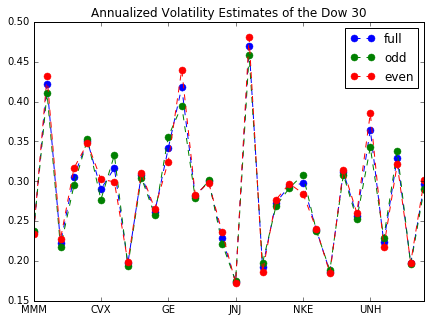

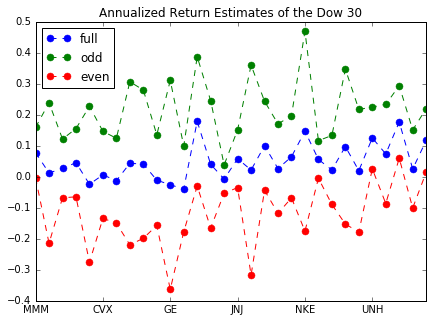

In [68]:
# alternating series, not actual odd/even dates
odd = rtn.iloc[::2]
even = rtn.iloc[1::2]

hxr_odd = odd.mean()*252 - 0.03
hxr_even = even.mean()*252 - 0.03
std_odd = odd.std()*np.sqrt(252)
std_even = even.std()*np.sqrt(252)
std = rtn.std()*np.sqrt(252)

df_std = pd.concat([std, std_odd, std_even], axis = 1, keys = ['full','odd','even'])
df_std.plot(title='Annualized Volatility Estimates of the Dow 30', style='.--',markersize=14,figsize=[7,5])
df_mean = pd.concat([hxr,hxr_odd,hxr_even], axis = 1,keys = ['full','odd','even'])
df_mean.plot(title='Annualized Return Estimates of the Dow 30', style='.--',markersize=14,figsize=[7,5])

plt.show()